## Regressione logistica in Python con scikit-learn: Esempio 4 riconoscimento della scrittura
Questo esempio riguarda il riconoscimento delle immagini, per essere più precisi, lavoreremo sul riconoscimento delle cifre scritte a mano. Utilizzeremo un set di dati con 1797 osservazioni, ognuna delle quali è un'immagine di una cifra scritta a mano, ogni immagine ha 64 px, con una larghezza di 8 px e un'altezza di 8 px.
Gli input (𝐱) sono vettori con 64 dimensioni o valori, ciascun vettore di input descrive un'immagine, ciascuno dei 64 valori rappresenta un pixel dell'immagine. 
- I valori di input sono numeri interi compresi tra 0 e 16, a seconda della tonalità di grigio del pixel corrispondente. 
- L'output (𝑦) per ciascuna osservazione è un numero intero compreso tra 0 e 9, coerente con la cifra sull'immagine. 
Ci sono dieci classi in totale, ciascuna corrispondente a un'immagine.

### Passaggio 1: importiamo i pacchetti
Dovremo importare Matplotlib, NumPy e diverse funzioni e classi da scikit-learn:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Passaggio 2 a: ottieniamo i dati
Possiamo prendere il set di dati direttamente da scikit-learn con load_digits(). Restituisce una tupla di input e output:

In [2]:
X, y = load_digits(return_X_y=True)
print(X)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


Questi sono i dati con cui lavorare, X è un array multidimensionale con 1797 righe e 64 colonne che contiene numeri interi da 0 a 16. 
y è un array unidimensionale con 1797 numeri interi compresi tra 0 e 9.

Proviamo a visualizzare qualche cifra:

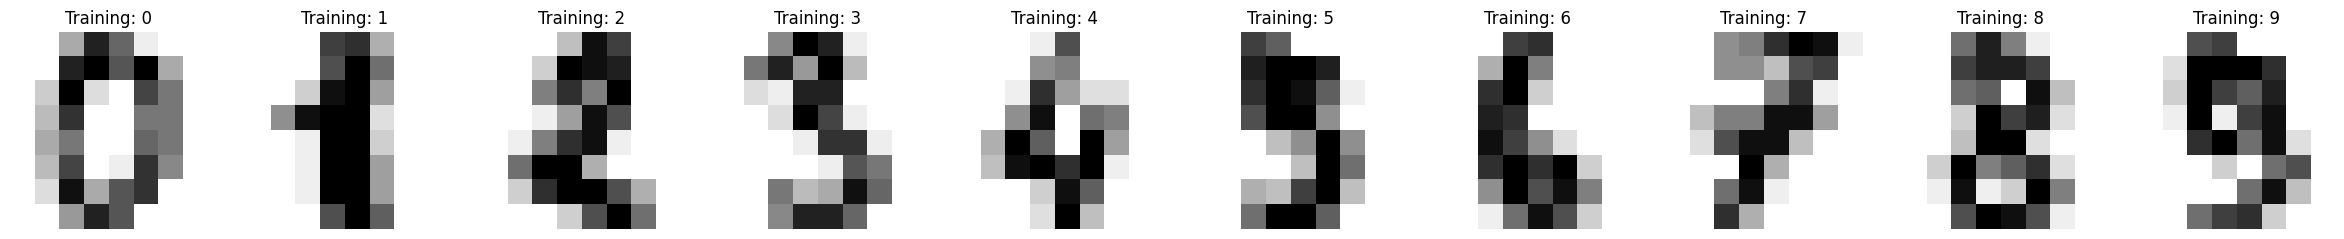

In [3]:
digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(30, 30))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

### Passaggio 2 b: suddivisione dei dati
Come abbiamo visto, è una pratica buona e ampiamente adottata dividere il set di dati con cui stiamo lavorando in due sottoinsiemi:
- set di addestramento 
- set di test. 
Utilizzeremo quindi il set di training per allenare il nostro modello e valuteremo le prestazioni con il set di prova. Come sappiamo questo approccio consente una valutazione imparziale del modello.

Un modo per suddividere il set di dati in set di training e test è applicare train_test_split() :

In [4]:
x_train, x_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=0)

train_test_split() richiede opzionalmente test_size, con che determina la dimensione del set di test e random_state che definisce lo stato del generatore di numeri pseudo-casuali, oltre ad altri argomenti opzionali. 

Una volta suddivisi i dati, possiamo dimenticarci momentaneamente di x_test e y_test finché non completiamo il modello.

### Passaggio 2 c: ridimensionare i dati
Come già visto, la standardizzazione è il processo di trasformazione dei dati in modo tale che la media di ciascuna colonna diventi uguale a zero e la deviazione standard di ciascuna colonna sia pari a uno. In questo modo si ottiene la stessa scala per tutte le colonne. Procediamo nel seguente modo per standardizzare i dati:

- Calcoliamo la media e la deviazione standard per ciascuna colonna.
- Sottraiamo la media corrispondente da ciascun elemento.
- Dividiamo la differenza ottenuta per la deviazione standard corrispondente.

Sebbene, come abbiamo visto in precedenza, in molti casi non sia necessario standardizzare i dati di input in questo caso è consigliabile per utilizzarli per la regressione logistica, infatti la standardizzazione potrebbe migliorare le prestazioni del algoritmo.

Possiamo standardizzare i nostri input creando un'istanza di StandardScaler e chiamando .fit_transform():

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

.fit_transform() come sappiamo adatta l'istanza di StandardScaler all'array passato come argomento, trasformando questo array restituisce il nuovo array standardizzato. Ora, x_train è un array di input standardizzato.

### Passaggio 3: creiamo un modello e addestriamolo
Ancora una volta, creiamo un'istanza di LogisticRegression e richiamiamo .fit():

In [6]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

c:\Users\Utente\Desktop\python\Python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Utente\Desktop\python\Python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.05
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'ovr'


Quando lavoriamo con problemi con più di due classi, è possibile specificare il multi_class parametro di LogisticRegression, esso determina come risolvere il problema:

- 'ovr' dice di adattare il binario a ogni classe.
- 'multinomial' dice di applicare l'adattamento multinomiale delle perdite.

### Passaggio 4: valutare il modello
Dovremo valutare il modello in modo simile a quello che abbiamo già fatto negli esempi precedenti, con la differenza che utilizzeremo principalmente x_test e y_test, che sono i sottoinsiemi non applicati per l'addestramento. Se abbiamo deciso di standardizzare x_train, il modello ottenuto si basa sui dati ridimensionati, quindi x_test dovrebbe essere ridimensionato anche con la stessa istanza di StandardScaler:

In [7]:
x_test = scaler.transform(x_test)

È così che ottieniamo un nuovo file x_test, in questo caso usiamo .transform() che trasforma solo l'argomento senza adattare lo scaler.

A questo punto è possibile ottenere le previsioni con .predict():



In [8]:
y_pred = model.predict(x_test)

La variabile y_pred è ora associata a una matrice degli output previsti, ora otteniamo la precisione con .score() con i dati di training e quelli di test:



In [9]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.964509394572025
0.9416666666666667


A questo punto possiamo ottenere la matrice di confusione e vederla graficamente considerando che conterrà 100 numeri:

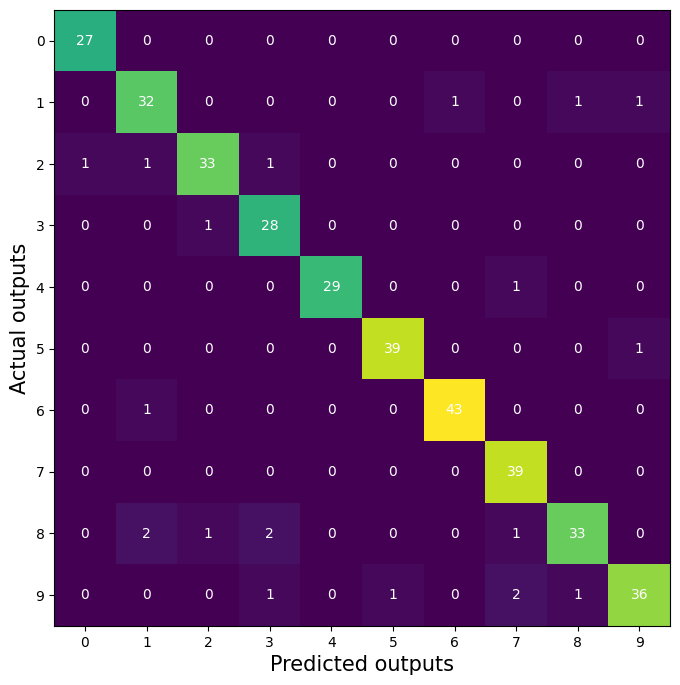

In [10]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=15, color='black')
ax.set_ylabel('Actual outputs', fontsize=15, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

Questa è la mappa termica che illustra la matrice di confusione con numeri e colori. Possiamo vedere che le sfumature del viola rappresentano numeri piccoli (come 0, 1 o 2), mentre il verde e il giallo mostrano numeri molto più grandi (27 e oltre).

I numeri sulla diagonale principale (27, 32, …, 36) mostrano il numero di previsioni corrette dal set di test. Ad esempio, ci sono 27 immagini con zero, 32 immagini con uno e così via che sono classificate correttamente. Altri numeri corrispondono a previsioni errate. A esempio, il numero 1 nella terza riga e nella prima colonna mostra che esiste un'immagine con il numero 2 classificato erroneamente come 0.

Infine, possiamo ottenere il report sulla classificazione come stringa o dizionario con classification_report():

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



## Esercizio 2
Partendo dal dataset al seguente link https://www.kaggle.com/datasets/dragonheir/logistic-regression/data create il modello più preciso possibile per prevedere gli acquisti in base alla caratteristica del cliente.